In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 数据全显示
pd.set_option('display.max_columns', None)
# 颜色
colors = sns.color_palette()
# 解决中文/小数点显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
#读取员工离职预测数据
df = pd.read_csv(r"C:\Users\zhouy\Desktop\数据科学技术与应用\员工离职预测训练赛\pfm_train.csv",delimiter=',')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,2,2,Manufacturing Director,3,Divorced,5993,1,Y,No,18,3,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,3,3,Manufacturing Director,3,Divorced,10502,7,Y,No,17,3,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,1,2,Laboratory Technician,3,Single,6074,1,Y,Yes,24,4,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,2,4,Manufacturing Director,4,Married,12742,1,Y,No,16,3,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,2,1,Laboratory Technician,2,Divorced,2596,1,Y,No,15,3,1,80,2,1,2,3,1,0,0,0


## 数据预处理-探索性分析

In [5]:
#数据降维：剔除无关变量“EmployeeNumber”(员工号码)、“Over18”（年龄是否超过18）、“StandardHours”（标准工时）
df = df.drop(['EmployeeNumber','Over18','StandardHours'],axis=1)

In [6]:
df.shape

(1100, 28)

In [5]:
#描述性统计
df.describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,2.725455,2.730909,2.054545,2.732727,6483.620909,2.683636,15.235455,3.152727,2.696364,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,1.098053,0.706366,1.107805,1.109731,4715.293419,2.510017,3.628571,0.359888,1.095356,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2924.500000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4857.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8354.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [6]:
#查看缺失值
df.isnull().sum(axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [7]:
#查看重复值
df.duplicated().sum(axis=0)

0

In [9]:
print('在职/离职均值：\n',df.groupby('Attrition').mean())

在职/离职均值：
                  Age  DistanceFromHome  Education  EnvironmentSatisfaction  \
Attrition                                                                    
0          37.695228          9.108460   2.943601                 2.772234   
1          33.393258         11.078652   2.814607                 2.483146   

           JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
Attrition                                                             
0                2.768980  2.136659         2.793926    6805.687636   
1                2.533708  1.629213         2.415730    4815.387640   

           NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
Attrition                                                             
0                    2.655098          15.193059           3.145336   
1                    2.831461          15.455056           3.191011   

           RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Attrition                      

C:\Users\zhouy\AppData\Local\Temp\ipykernel_11056\1141211705.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print('在职/离职均值：\n',df.groupby('Attrition').mean())


In [10]:
print('在职/离职方差：\n',df.groupby('Attrition').var())

在职/离职方差：
                  Age  DistanceFromHome  Education  EnvironmentSatisfaction  \
Attrition                                                                    
0          78.016676         65.050113   1.041333                 1.159793   
1          85.550689         75.406208   1.055831                 1.381070   

           JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
Attrition                                                             
0                0.462316  1.249491         1.201787   2.312447e+07   
1                0.645750  0.901289         1.272520   1.438707e+07   

           NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
Attrition                                                             
0                    6.191445          12.727074           0.124348   
1                    6.875389          15.469720           0.155399   

           RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Attrition                      

C:\Users\zhouy\AppData\Local\Temp\ipykernel_11056\1674161345.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print('在职/离职方差：\n',df.groupby('Attrition').var())


In [49]:
#'MonthlyIncome'的方差太大，取对数且新建变量，删除原来变量
#df['LnMonthlyIncome'] = df['MonthlyIncome'].apply(np.log2)
#df = df.drop(['MonthlyIncome'],axis=1)

In [39]:
#对所有数值型做标准化（归一）
#from sklearn import preprocessing
#minmax_scaler = preprocessing.MinMaxScaler()
#df_norm = minmax_scaler.fit_transform(df)

## 数据可视化

### 查看所有数据分布

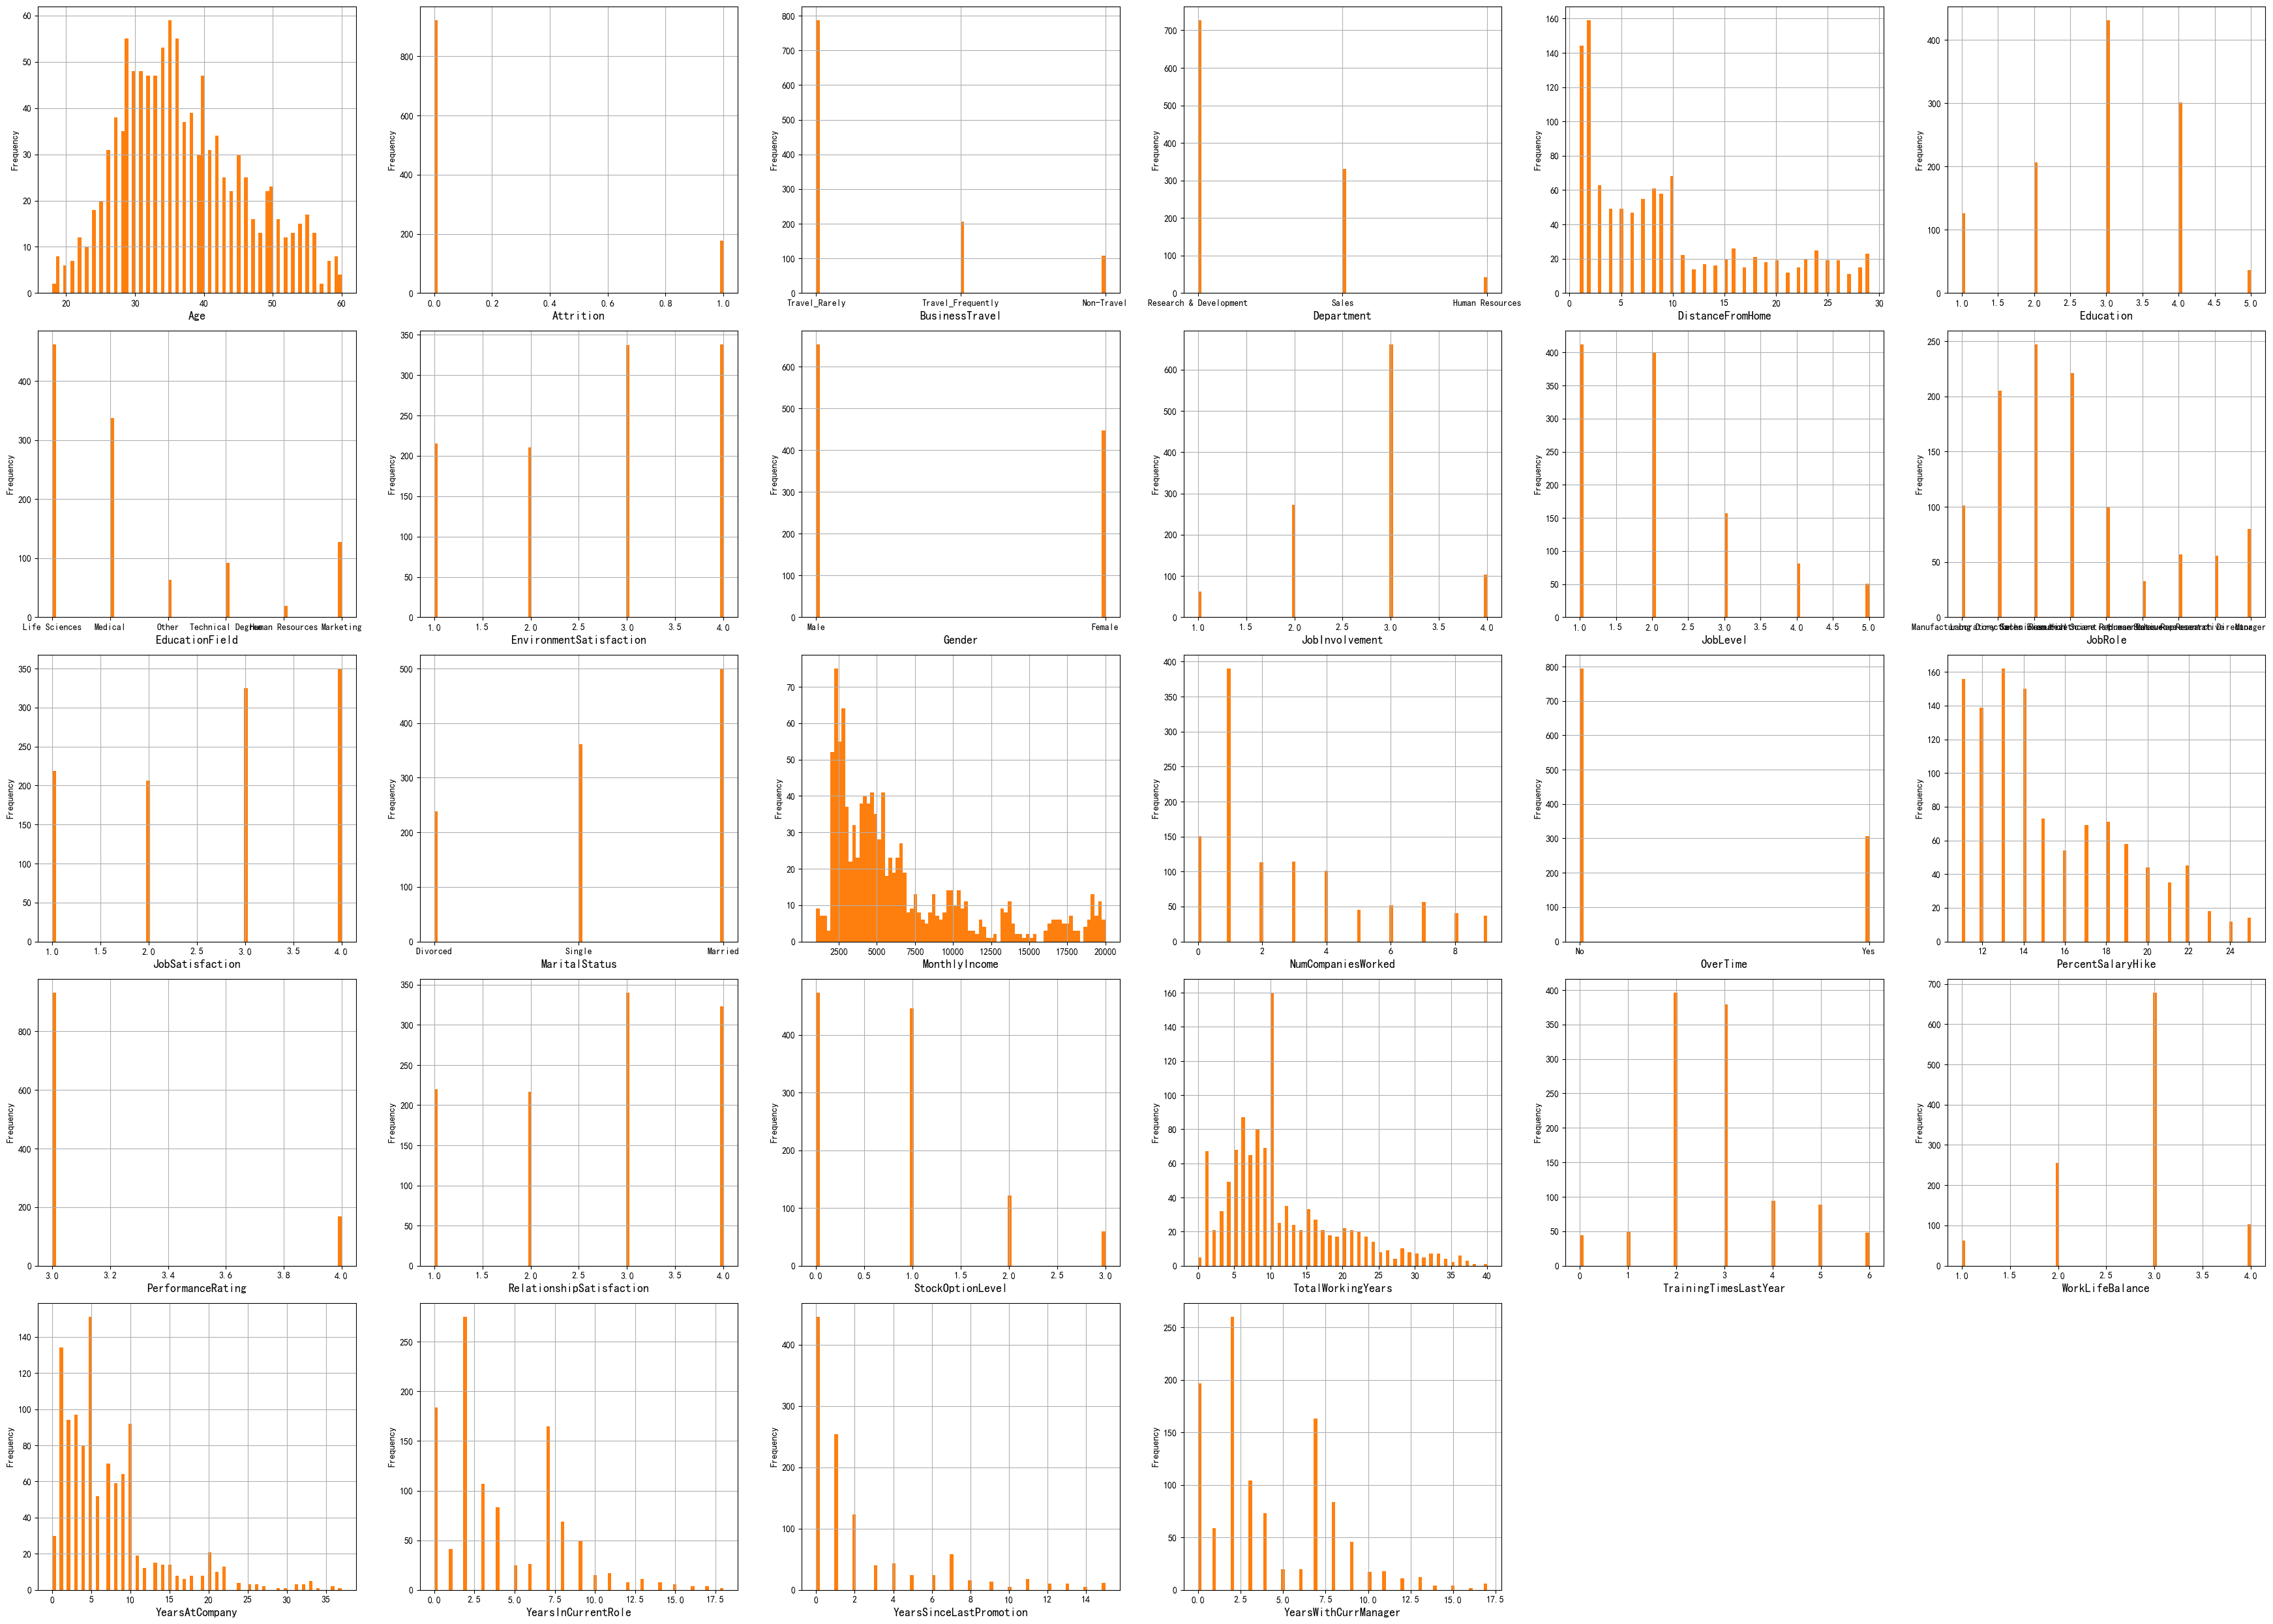

In [8]:
# 查看所有数据分布
colnm = df.columns.to_list()
plt.figure(figsize=(35, 25))
for i in range(28):
    plt.subplot(5, 6, i+1)  # 3行4列 位置是i+1的子图
    df[colnm[i]].hist(bins=80, color=colors[1])# bins 指定显示多少竖条
    plt.xlabel(colnm[i], fontsize=13)
    plt.ylabel('Frequency')
plt.tight_layout()

### 查看整体离职情况

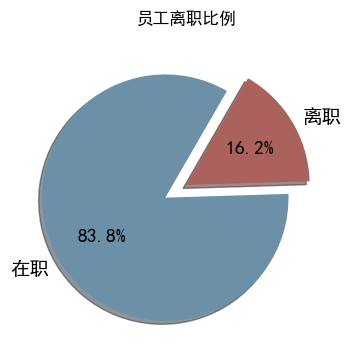

In [25]:
#绘图观察离职员工比例
df_pie =pd.Series( [df['Attrition'].value_counts()[0],df['Attrition'].value_counts()[1]],index=(['在职','离职']))
names = ['在职','离职']
df_pie.plot(kind='pie',figsize=(4,4) ,title='员工离职比例',\
            fontsize=14,explode=[0.2,0],shadow=True,startangle=60,labels=names,colors=(['#6b90a7','#ab625c']), autopct='%1.1f%%')
plt.show()

### 分组查看各离散无序变量与员工离职的关系

C:\Users\zhouy\AppData\Local\Temp\ipykernel_4160\1164430208.py:7: UserWarning: The label '_' of <BarContainer object of 3 artists> starts with '_'. It is thus excluded from the legend.
  plt.legend('_',framealpha=0)
C:\Users\zhouy\AppData\Local\Temp\ipykernel_4160\1164430208.py:13: UserWarning: The label '_' of <BarContainer object of 3 artists> starts with '_'. It is thus excluded from the legend.
  plt.legend('_',framealpha=0)


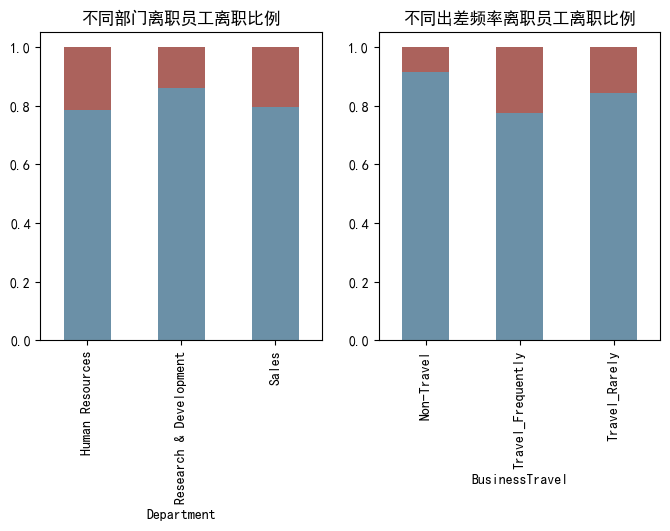

In [41]:
fig=plt.figure(figsize=(8,4))
#Department员工所在部门与员工离职情况的柱状图
ax1 = fig.add_subplot(1,2,1)
df_Department = pd.crosstab(df.Department,df.Attrition)
df_Department.div(df_Department.sum(axis=1).astype(float),axis=0).plot(kind='bar',rot=90,title='不同部门离职员工离职比例',\
                                                                    color=['#6b90a7','#ab625c'],stacked=True,width=0.5,ax=ax1)
plt.legend('_',framealpha=0)
#BusinessTravel员工出差频率与员工离职情况的柱状图
ax2 = fig.add_subplot(1,2,2)
df_Business = pd.crosstab(df.BusinessTravel,df.Attrition)
df_Business.div(df_Business.sum(axis=1).astype(float),axis=0).plot(kind='bar',rot=90,title='不同出差频率离职员工离职比例',\
                                                            color=['#6b90a7','#ab625c'],stacked=True,width=0.5,ax=ax2)
plt.legend('_',framealpha=0)


C:\Users\zhouy\AppData\Local\Temp\ipykernel_4160\1970973610.py:7: UserWarning: The label '_' of <BarContainer object of 6 artists> starts with '_'. It is thus excluded from the legend.
  plt.legend('_',framealpha=0)
C:\Users\zhouy\AppData\Local\Temp\ipykernel_4160\1970973610.py:13: UserWarning: The label '_' of <BarContainer object of 2 artists> starts with '_'. It is thus excluded from the legend.
  plt.legend('_',framealpha=0)


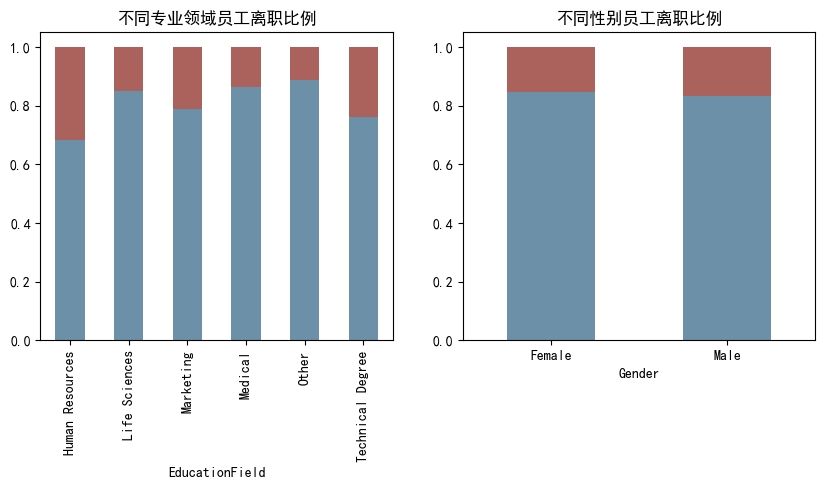

In [40]:
fig=plt.figure(figsize=(10,4))
#EducationField员工专业领域与员工离职情况的柱状图
ax1 = fig.add_subplot(1,2,1)
df_Education = pd.crosstab(df.EducationField,df.Attrition)
df_Education.div(df_Education.sum(axis=1).astype(float),axis=0).plot(kind='bar',rot=90,title='不同专业领域员工离职比例',\
                                                            color=['#6b90a7','#ab625c'],stacked=True,width=0.5,ax=ax1)
plt.legend('_',framealpha=0)
#Gender员工性别与员工离职情况的柱状图
ax2 = fig.add_subplot(1,2,2)
df_Gender = pd.crosstab(df.Gender,df.Attrition)
df_Gender.div(df_Gender.sum(axis=1).astype(float),axis=0).plot(kind='bar',rot=0,title='不同性别员工离职比例',\
                                                            color=['#6b90a7','#ab625c'],stacked=True,width=0.5,ax=ax2)
plt.legend('_',framealpha=0)

#### 不同性别离职率相差不大，故删除Gender变量

C:\Users\zhouy\AppData\Local\Temp\ipykernel_4160\1186240479.py:7: UserWarning: The label '_' of <BarContainer object of 9 artists> starts with '_'. It is thus excluded from the legend.
  plt.legend('_',framealpha=0)
C:\Users\zhouy\AppData\Local\Temp\ipykernel_4160\1186240479.py:13: UserWarning: The label '_' of <BarContainer object of 3 artists> starts with '_'. It is thus excluded from the legend.
  plt.legend('_',framealpha=0)


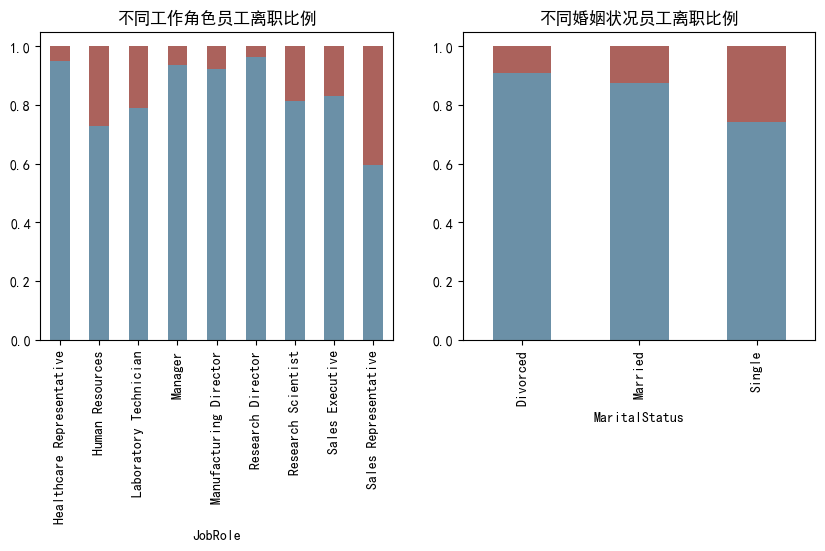

In [38]:
fig=plt.figure(figsize=(10,4))
#JobRole员工工作角色与员工离职情况的柱状图
ax1 = fig.add_subplot(1,2,1)
df_JobRole = pd.crosstab(df.JobRole,df.Attrition)
df_JobRole.div(df_JobRole.sum(axis=1).astype(float),axis=0).plot(kind='bar',rot=90,title='不同工作角色员工离职比例',\
                                                            color=['#6b90a7','#ab625c'],stacked=True,width=0.5,ax=ax1)
plt.legend('_',framealpha=0)
#MaritalStatus婚姻状况与员工离职情况的柱状图
ax2 = fig.add_subplot(1,2,2)
df_MaritalStatus = pd.crosstab(df.MaritalStatus,df.Attrition)
df_MaritalStatus.div(df_MaritalStatus.sum(axis=1).astype(float),axis=0).plot(kind='bar',rot=90,title='不同婚姻状况员工离职比例',\
                                                            color=['#6b90a7','#ab625c'],stacked=True,width=0.5,ax=ax2)
plt.legend('_',framealpha=0)

C:\Users\zhouy\AppData\Local\Temp\ipykernel_4160\861090317.py:6: UserWarning: The label '_' of <BarContainer object of 2 artists> starts with '_'. It is thus excluded from the legend.
  plt.legend('_',framealpha=0)


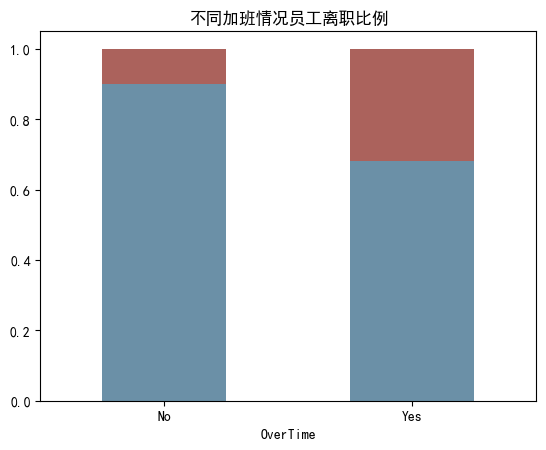

In [39]:
#OverTime加班情况与员工离职情况的柱状图

df_OverTime = pd.crosstab(df.OverTime,df.Attrition)
df_OverTime.div(df_OverTime.sum(axis=1).astype(float),axis=0).plot(kind='bar',rot=0,title='不同加班情况员工离职比例',\
                                                            color=['#6b90a7','#ab625c'],stacked=True,width=0.5)
plt.legend('_',framealpha=0)

### 分组查看各数值型连续变量与员工离职的关系

Text(0.5, 1.0, '员工工作过的公司与离职率的关系')

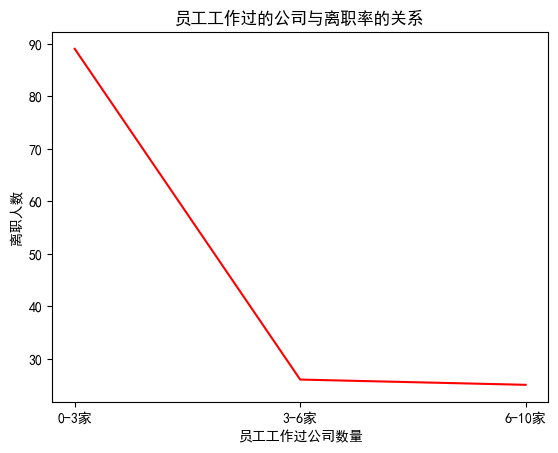

In [36]:
# 员工工作过的公司与离职率的关系
df_worked1 = df[(df['NumCompaniesWorked'] > 0) & (df['NumCompaniesWorked'] < 3)]
df_worked2 = df[(df['NumCompaniesWorked'] > 3) & (df['NumCompaniesWorked'] < 6)]
df_worked3 = df[(df['NumCompaniesWorked'] > 6) & (df['NumCompaniesWorked'] < 10)]
x = ['0-3家', '3-6家', '6-10家']
y = [sum(df_worked1['Attrition'] == 1), sum(df_worked2['Attrition'] == 1), sum(df_worked3['Attrition'] == 1)]
plt.plot(x, y, color='r')
plt.xlabel('员工工作过公司数量')
plt.ylabel('离职人数')
plt.title("员工工作过的公司与离职率的关系")

### 绘制热力图

In [6]:
# 列变量属性分类：有序分类变量、无序分类变量、连续型数值变量
cols_cat = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
cols_cat_not_ord = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
cols_num = ['Age',  'DistanceFromHome',  'MonthlyIncome',  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
 
cols_feat = cols_cat + cols_cat_not_ord + cols_num
col_target = ['Attrition'] # Yes-1/No-0

In [5]:
#离散值进行one-hot编码
dumm_dep = pd.get_dummies( df['Department'], prefix='Department' )
dumm_bt = pd.get_dummies( df['BusinessTravel'], prefix='BusinessTravel' )
dumm_ef = pd.get_dummies( df['EducationField'], prefix='EducationField' )
dumm_jr = pd.get_dummies( df['JobRole'], prefix='JobRole' )
dumm_ms = pd.get_dummies( df['MaritalStatus'], prefix='MaritalStatus' )
dumm_ot = pd.get_dummies( df['OverTime'], prefix='OverTime' )

In [7]:
corr_data = df[cols_num+cols_cat+col_target]

In [8]:
corr=corr_data.corr(method='spearman')
corr

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition
Age,1.000000,-0.007287,0.467816,0.348605,0.000717,0.650991,-0.032819,0.251068,0.206858,0.195256,0.193872,0.194501,0.013993,0.062323,0.487336,0.004520,-0.025432,0.056217,0.018674,0.016287,-0.189271
DistanceFromHome,-0.007287,1.000000,0.007909,0.011673,0.037892,0.003192,-0.033493,0.010403,0.002646,-0.013078,-0.002530,0.004855,0.004944,0.043133,0.035800,-0.018261,0.005561,0.017907,0.033271,-0.041336,0.086829
MonthlyIncome,0.467816,0.007909,1.000000,0.200410,-0.067588,0.709033,-0.051109,0.464475,0.414909,0.304805,0.364933,0.107155,-0.037922,-0.007277,0.921306,-0.001816,-0.056729,0.013457,0.040983,0.034365,-0.197936
NumCompaniesWorked,0.348605,0.011673,0.200410,1.000000,0.004198,0.316276,-0.058676,-0.162364,-0.116357,-0.068764,-0.138628,0.125211,-0.019335,0.058086,0.189350,-0.058673,0.026737,0.064870,-0.000335,0.022905,0.016358
PercentSalaryHike,0.000717,0.037892,-0.067588,0.004198,1.000000,-0.047643,0.018635,-0.088491,-0.049521,-0.059676,-0.051067,-0.007554,-0.004624,0.008493,-0.064510,0.030342,0.626784,-0.019781,0.031468,0.018455,0.009099
TotalWorkingYears,0.650991,0.003192,0.709033,0.316276,-0.047643,1.000000,-0.033085,0.596621,0.502593,0.353781,0.498217,0.132396,-0.034083,0.023810,0.732118,-0.014930,-0.011534,0.024177,0.037121,0.000998,-0.211808
TrainingTimesLastYear,-0.032819,-0.033493,-0.051109,-0.058676,0.018635,-0.033085,1.000000,-0.005329,0.003931,0.012491,-0.019057,-0.023371,-0.036681,0.001769,-0.033921,-0.000014,-0.008496,0.004763,-0.003189,0.038251,-0.039825
YearsAtCompany,0.251068,0.010403,0.464475,-0.162364,-0.088491,0.596621,-0.005329,1.000000,0.859473,0.532284,0.837884,0.070824,-0.000179,-0.000837,0.469628,0.007867,-0.023386,-0.014007,0.067518,0.010583,-0.188372
YearsInCurrentRole,0.206858,0.002646,0.414909,-0.116357,-0.049521,0.502593,0.003931,0.859473,1.000000,0.507946,0.725925,0.052361,0.006184,-0.005568,0.403871,-0.000640,0.001403,-0.025928,0.073316,0.018544,-0.182404
YearsSinceLastPromotion,0.195256,-0.013078,0.304805,-0.068764,-0.059676,0.353781,0.012491,0.532284,0.507946,1.000000,0.470937,0.040145,0.024240,-0.036040,0.311087,0.012475,-0.026488,0.056561,0.019340,-0.016813,-0.072240


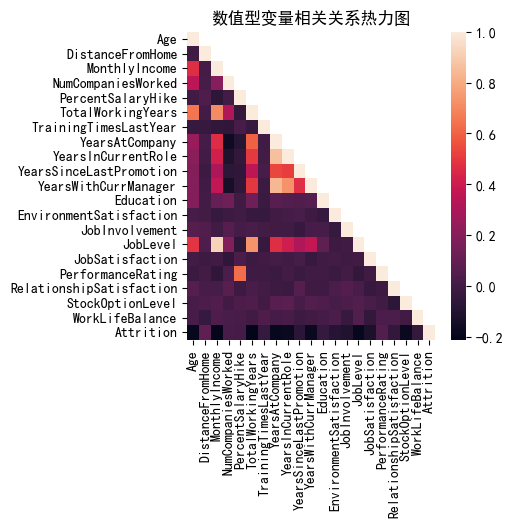

In [10]:
plt.figure(figsize=(4,4))
mask = np.zeros_like(corr)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i] = True
sns.heatmap(corr,xticklabels=corr.columns.values,mask=mask,yticklabels=corr.columns.values)
plt.title('数值型变量相关关系热力图')
plt.show()


In [17]:
#挑选出10个相关性最高的变量
features = df.corr(method='spearman')['Attrition'].abs().sort_values(ascending=False)[:11]
features.drop('Attrition', axis=0, inplace=True)
features = features.index
features

C:\Users\zhouy\AppData\Local\Temp\ipykernel_11920\2997300240.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features = df.corr(method='spearman')['Attrition'].abs().sort_values(ascending=False)[:11]


Index(['TotalWorkingYears', 'MonthlyIncome', 'JobLevel', 'Age',
       'YearsAtCompany', 'YearsInCurrentRole', 'StockOptionLevel',
       'YearsWithCurrManager', 'JobSatisfaction', 'JobInvolvement'],
      dtype='object')

In [78]:
#观察变量分布形状
#df['TotalWorkingYears'].hist(bins=30,alpha = 0.5,ax = ax2)
#df['DistanceFromHome'].plot(kind = 'kde', secondary_y=True)
#plt.grid()

### 查看各数值型变量与离职的关系

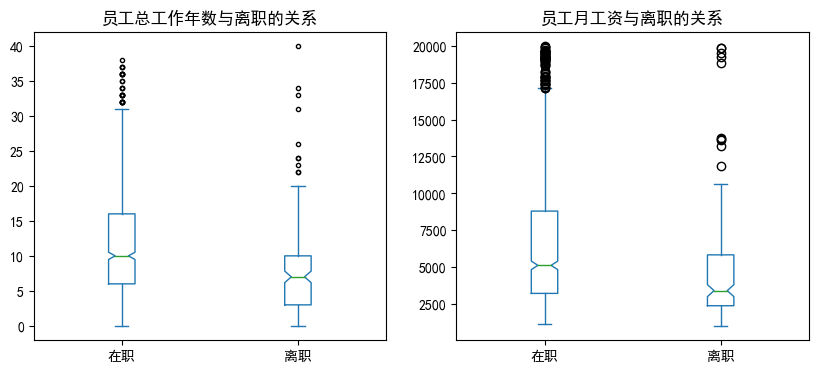

In [30]:
fig=plt.figure(figsize=(10,4))
#查看TotalWorkingYears与离职的关系
ax1 = fig.add_subplot(1,2,1)
data1 = df[['TotalWorkingYears','Attrition']]   
data1.plot(kind='box', by='Attrition',grid=False,notch=True,figsize=(4,4),sym='.',ax=ax1)
plt.title('员工总工作年数与离职的关系')
plt.xticks([1,2],['在职','离职'])
#plt.show()
#查看MonthlyIncome与离职的关系
ax2 = fig.add_subplot(1,2,2)
data2 = df[['MonthlyIncome','Attrition']]   
data2.plot(kind='box',by='Attrition',grid=False,notch=True,ax=ax2)
plt.title('员工月工资与离职的关系')
plt.xticks([1,2],['在职','离职'])
plt.show()